#  **Voyages Metrics - Top 3 Loading Locations, Discharge Locations, Cargo Types**

## Run this example in [Colab](https://colab.research.google.com/github/SignalOceanSdk/SignalSDK/blob/master/docs/examples/jupyter/VoyagesAPI/Voyages_Metrics_Top_3_Loading_Locations_Discharge_Locations_Cargo_Types.ipynb). 

**APIs Used:** Voyages


---





**Description:**

The goal of this example is to create key metrics using the Voyages API. We retrieve data for a specified time period and vessel class. After selecting a Starting Area, we generate charts showcasing the top 3 Loading Countries, Discharge Countries, and Cargo Types based on voyage data.



---

**Output:** Charts By loading Country, Discharge Country, Cargo Type

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
Set your subscription key acquired here: https://apis.signalocean.com/profile

In [1]:
!pip install signal-ocean

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [2]:
signal_ocean_api_key = '' #replace with your subscription key

In [3]:
from signal_ocean import Connection
from signal_ocean.voyages import VoyagesAPI, VesselClass, VesselClassFilter
import pandas as pd
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [4]:
connection = Connection(signal_ocean_api_key)
api = VoyagesAPI(connection)

We need to specify the following parameters for our queries:


1.   startingArea - The Starting Area of our Voyages
2.   vesselClass - the class of queried vessels.

1.   dateFrom - The starting date of queried voyages.


In [5]:
startingArea = 'Arabian Gulf'
vesselClass = 'Aframax'
dateFrom = date(2024, 6, 1) # Define a specific date as the minimum Starting Voyage Date  (e.g., "2024-01-01")

Declare helper functions

In [6]:
def get_voyage_start_area(voyage_events):
    return next((e.area_name_level0 for e in voyage_events or [] if e.event_type =='VoyageStart' ), None)

def get_voyage_discharge_countries(voyage_events):  # Returns a list of all discharge countries from voyage events.
    return [e.country for e in reversed(voyage_events or []) if e.purpose == 'Discharge']

def get_voyage_load_countries(voyage_events):   #  Returns a list of all load countries from voyage events.
    return [e.country for e in voyage_events or [] if e.purpose == 'Load']


### Get voyages

In [7]:
vesselClass = api.get_vessel_classes(VesselClassFilter(vesselClass))
aframaxId = vesselClass[0].vessel_class_id
aframaxId

86

Calling Voyages API for the Vessel Class & the dates of our preference

In [8]:
#Calling the API for the Vessel Class and after a specifc Starting Voyage Date
voyages = api.get_voyages_by_advanced_search(vessel_class_id=aframaxId, start_date_from=dateFrom)
voyages = pd.DataFrame(v.__dict__ for v in voyages)

In [9]:

voyages['discharge_country'] = voyages['events'].apply(get_voyage_discharge_countries)
voyages['load_country'] = voyages['events'].apply(get_voyage_load_countries)

In [10]:

voyages['start_area']= voyages['events'].apply(get_voyage_start_area)
# Filter voyages in Starting Area
voyagesStartingArea = voyages[voyages['start_area'] == startingArea]

Creating a chart for the top 3 Load Countries

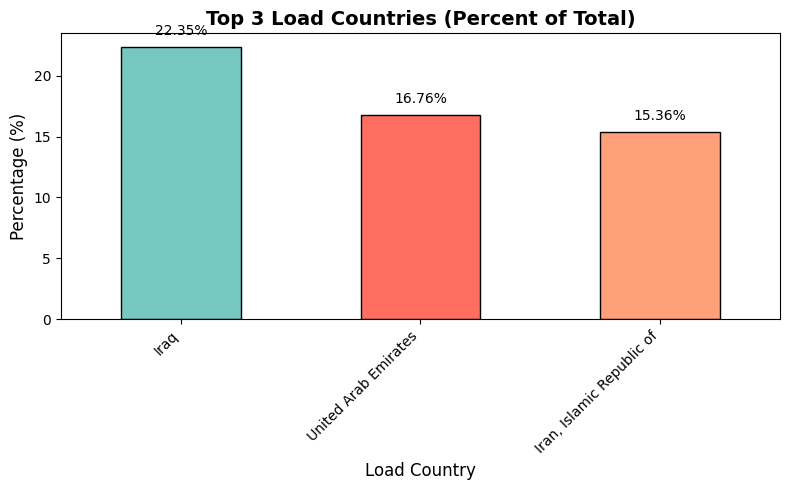

In [11]:
# Get value counts for load countries
flattened_load_countries = [country for sublist in voyagesStartingArea['load_country'] for country in sublist]
load_counts = pd.Series(flattened_load_countries).value_counts()
load_percentages = ((load_counts / load_counts.sum()) * 100).round(2)

# Get the top 3 load countries by percentage
top_3_load_countries = load_percentages.head(3)

# Plot a bar chart
plt.figure(figsize=(8, 5))
top_3_load_countries.plot(kind='bar', color=['#76c7c0', '#ff6f61', '#ffa07a'], edgecolor='black')

# Add chart details
plt.title('Top 3 Load Countries (Percent of Total)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Load Country', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show percentage values on top of bars
for index, value in enumerate(top_3_load_countries):
    plt.text(index, value + 1, f'{value}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Creating a chart for the top 3 Discharge Countries

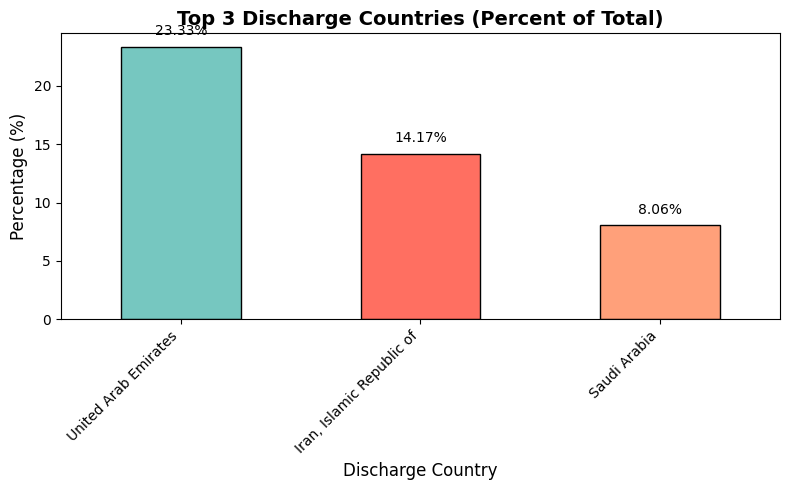

In [12]:
# Get value counts for discharge countries
flattened_discharge_countries = [country for sublist in voyagesStartingArea['discharge_country'] for country in sublist]
discharge_counts = pd.Series(flattened_discharge_countries).value_counts()
discharge_percentages = ((discharge_counts / discharge_counts.sum()) * 100).round(2)

# Get the top 3 discharge countries by percentage
top_3_discharge_countries = discharge_percentages.head(3)

# Plot a bar chart
plt.figure(figsize=(8, 5))
top_3_discharge_countries.plot(kind='bar', color=['#76c7c0', '#ff6f61', '#ffa07a'], edgecolor='black')

# Add chart details
plt.title('Top 3 Discharge Countries (Percent of Total)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Discharge Country', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show percentage values on top of bars
for index, value in enumerate(top_3_discharge_countries):
    plt.text(index, value + 1, f'{value}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


Creating a chart for the top 3 Cargo Types

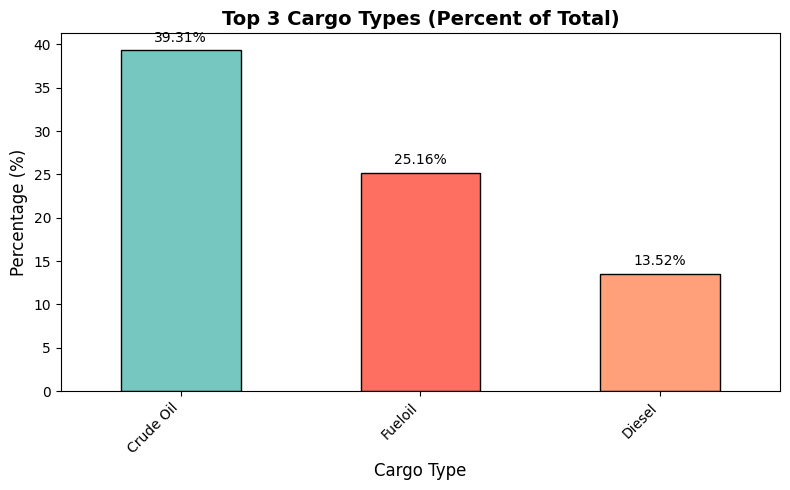

In [13]:
# Get value counts for cargo types
cargo_types_counts = voyagesStartingArea['cargo_type'].value_counts()
cargo_types_percentages = ((cargo_types_counts / cargo_types_counts.sum()) * 100).round(2)

# Get the top 3 load cargo types
top_3_cargo_types = cargo_types_percentages.head(3)

# Plot a bar chart
plt.figure(figsize=(8, 5))
top_3_cargo_types.plot(kind='bar', color=['#76c7c0', '#ff6f61', '#ffa07a'], edgecolor='black')

# Add chart details
plt.title('Top 3 Cargo Types (Percent of Total)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Cargo Type', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show percentage values on top of bars
for index, value in enumerate(top_3_cargo_types):
    plt.text(index, value + 1, f'{value}%', ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()